In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
dataset=pd.read_csv('dataset0.csv')

In [2]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING
dataset['total_calls']=dataset['total_day_calls']+dataset['total_eve_calls']+dataset['total_night_calls']
dataset['total_minutes']=dataset['total_day_minutes']+dataset['total_eve_minutes']+dataset['total_night_minutes']
dataset['total_charges']=dataset['total_day_charge']+dataset['total_eve_charge']+dataset['total_night_charge']
dataset.drop(['total_day_calls','total_eve_calls','total_night_calls','total_day_minutes','total_eve_minutes','total_night_minutes','total_day_charge','total_eve_charge','total_night_charge'],axis=1,inplace=True)
dataset['churn'] = dataset['churn'].replace({'no':0,'yes':1})
churn_column = dataset['churn']
dataset.drop('churn',axis=1,inplace=True)
dataset['churn'] = churn_column
###THIS SECTION IS DATASET SPECIFIC PROCESSING


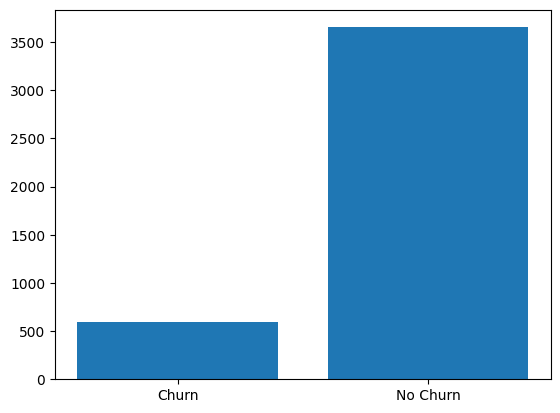

In [3]:
from pre_processor import PreProcessor


label_column = 'churn'
pre_processor = PreProcessor(dataset)
pre_processor.rename_label(label_column).split_features_labels().plot_imbalance()
   

In [4]:
binary_encode_columns=['state','area_code','international_plan','voice_mail_plan']
one_hot_encode_columns=[]
ordinal_encode_columns=[]
scaling_columns=['account_length','number_vmail_messages','total_intl_minutes','total_intl_calls',
                     'total_intl_charge','number_customer_service_calls','total_calls','total_minutes','total_charges']


In [5]:

pre_processor.\
    remove_nans().\
    remove_duplicates().\
    scale(scaling_columns).\
    binary_encode(binary_encode_columns).\
    onehot_encode(one_hot_encode_columns).\
    ordinal_encode(ordinal_encode_columns).\
    oversample()
    

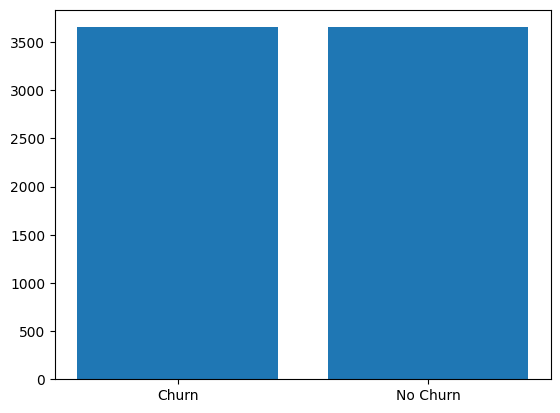

In [6]:
pre_processor.plot_imbalance()

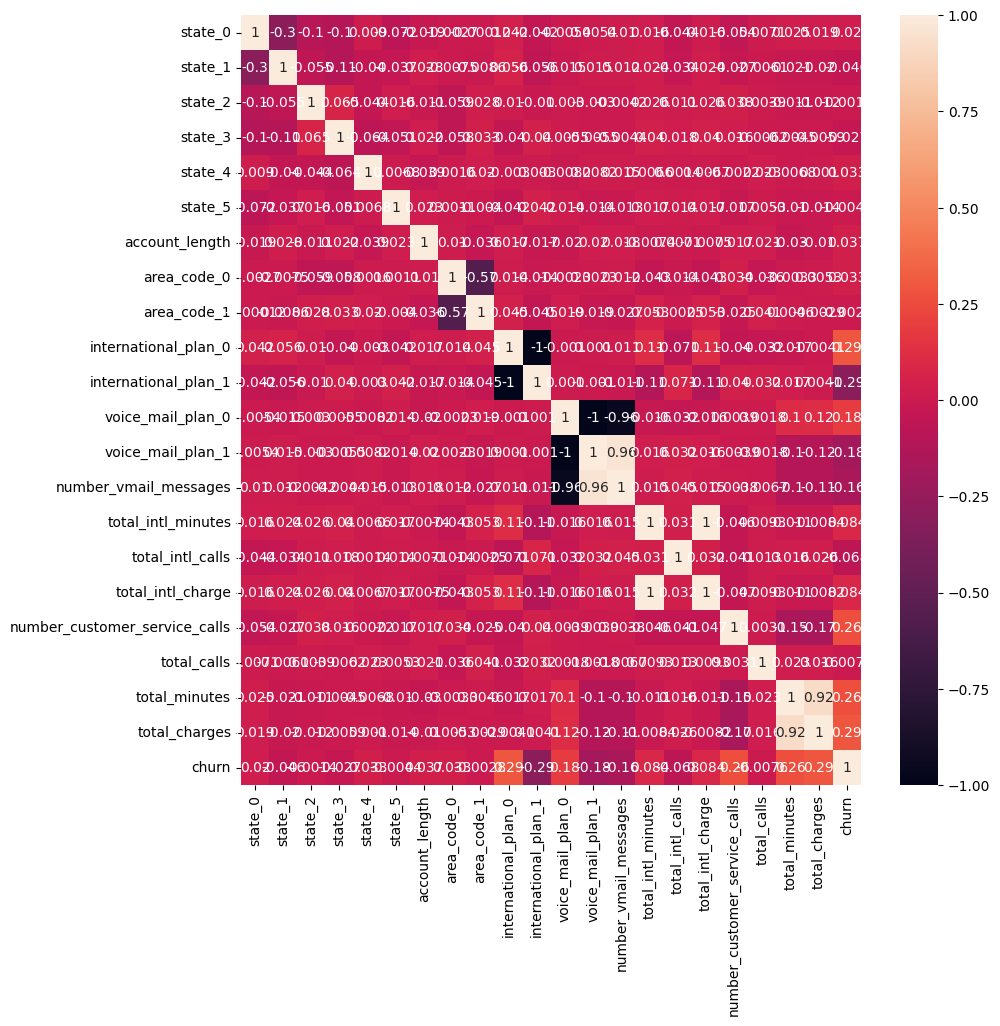

In [7]:
pre_processor.plot_correlation()

In [8]:
pre_processor.calculate_feature_importance()

,importance
total_charges,0.255038
number_customer_service_calls,0.156903
total_minutes,0.136143
international_plan_1,0.058477
international_plan_0,0.053335
total_intl_calls,0.050279
total_intl_charge,0.049893
total_intl_minutes,0.049561
account_length,0.043189
total_calls,0.042305


In [9]:
pre_processor.remove_features_by_importance(0.01)

In [10]:
pre_processor.split_features_labels()

In [11]:
pre_processor.calculate_feature_importance()

,importance
total_charges,0.290425
number_customer_service_calls,0.168829
total_minutes,0.120302
international_plan_1,0.064048
total_intl_minutes,0.056479
total_intl_calls,0.054308
international_plan_0,0.051384
total_intl_charge,0.051188
total_calls,0.045686
account_length,0.045611


In [12]:
X_train,X_test,y_train,y_test = pre_processor.train_test_split()

In [13]:
from train_setup import Model_selection

model_select=Model_selection()

model_select.train(X_train,y_train,X_test,y_test,n_trials_=2)

[I 2024-06-11 07:09:37,111] A new study created in memory with name: no-name-1119aa38-e65b-438e-ab97-cb180b5241cc
[I 2024-06-11 07:09:37,803] Trial 0 finished with value: 0.92811925073532 and parameters: {'n_estimators': 24, 'max_depth': 25, 'min_samples_split': 8, 'min_samples_leaf': 20}. Best is trial 0 with value: 0.92811925073532.
[I 2024-06-11 07:09:43,508] Trial 1 finished with value: 0.9313710641339631 and parameters: {'n_estimators': 196, 'max_depth': 21, 'min_samples_split': 16, 'min_samples_leaf': 15}. Best is trial 1 with value: 0.9313710641339631.
[I 2024-06-11 07:09:43,508] A new study created in memory with name: no-name-9d0770a3-ef61-4d37-b963-5416021c56ea
[I 2024-06-11 07:09:48,575] Trial 0 finished with value: 0.8967991609735518 and parameters: {'num_layers': 3, 'layer1_size': 55, 'layer2_size': 33, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.07164550373014589}. Best is trial 0 with value: 0.8967991609735518.
[I 2024-06-11 07:09:55,574] Trial 1 finished with val

In [14]:
model_select.classification_reports()

Random Forest
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.93       748
         1.0       0.98      0.87      0.92       713

    accuracy                           0.93      1461
   macro avg       0.94      0.93      0.93      1461
weighted avg       0.93      0.93      0.93      1461

Neural Network
              precision    recall  f1-score   support

         0.0       0.91      0.95      0.93       748
         1.0       0.94      0.90      0.92       713

    accuracy                           0.92      1461
   macro avg       0.93      0.92      0.92      1461
weighted avg       0.92      0.92      0.92      1461



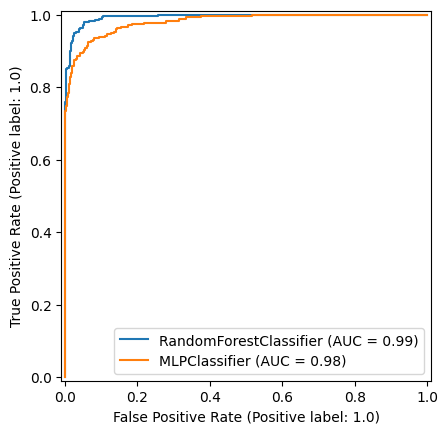

In [15]:
model_select.roc_curve()

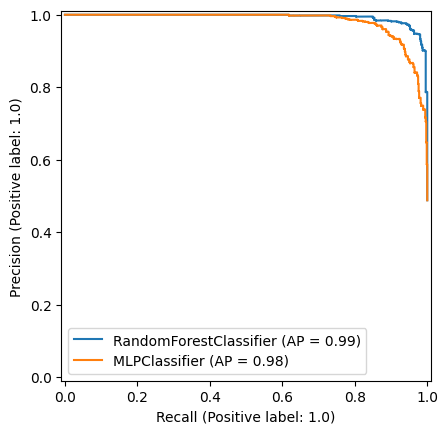

In [16]:
model_select.precision_recall_curve()